<a href="https://colab.research.google.com/github/yong2691/DataScience/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(%EC%98%A4%EC%86%8C%EC%A7%84%EA%B0%95%EC%82%AC%EB%8B%98)/%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C02_%EC%99%80%EC%9D%B8%ED%92%88%EC%A7%88%EB%B6%84%EB%A5%98_210707_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#라이브러리 임포트


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split #일반적인 함수들은 소문자
from sklearn.preprocessing import StandardScaler #객체를 생성하거나 뭘 해야되는애들은 대문자, 스케일을 0~1 로 조정

# Libraries for creating ML model
from sklearn.linear_model import LogisticRegression     #선형회귀
from sklearn.tree import DecisionTreeClassifier    #결정트리
from sklearn.ensemble import RandomForestClassifier     #랜덤포레스트
from sklearn.ensemble import GradientBoostingClassifier     #그레디언트부스팅클래씨파이어

# Library for Analysing the ML model
from sklearn import metrics

# keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu
from keras.optimizers import Adam

#데이터 가져오기

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data set/train.csv')


In [3]:
df.sample(5)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
2467,2467,6,6.8,0.33,0.30,2.1,0.047,35.0,147.0,0.98860,3.24,0.56,13.4,white
5271,5271,6,6.8,0.25,0.29,2.0,0.042,19.0,189.0,0.99520,3.46,0.54,10.2,white
1750,1750,5,7.1,0.23,0.28,1.9,0.046,33.0,103.0,0.98997,3.12,0.31,12.0,white
2564,2564,5,6.9,0.26,0.33,12.6,0.051,59.0,173.0,0.99800,3.39,0.38,9.9,white
197,197,6,6.4,0.30,0.51,5.5,0.048,62.0,172.0,0.99420,3.08,0.45,9.1,white


In [4]:
df.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [5]:
df.tail()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
5492,5492,5,7.7,0.15,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.18,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.15,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.41,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white
5496,5496,6,7.0,0.35,0.17,1.1,0.049,7.0,119.0,0.99297,3.13,0.36,9.7,white


In [6]:
df.info()

# 총 5497개의 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


#데이터 전처리

In [7]:
df.isna().sum()

# na값이 없는 깔끔한 데이터셋

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [8]:
# 데이터 확인

print("quality min : ", df['quality'].min())
print("quality max : ", df['quality'].max())
Qmean = df['quality'].mean()
print(f'quality mean : {Qmean:.1f}')
print(df['quality'].value_counts())

quality min :  3
quality max :  9
quality mean : 5.8
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64


#아웃라이어(이상치) 제거

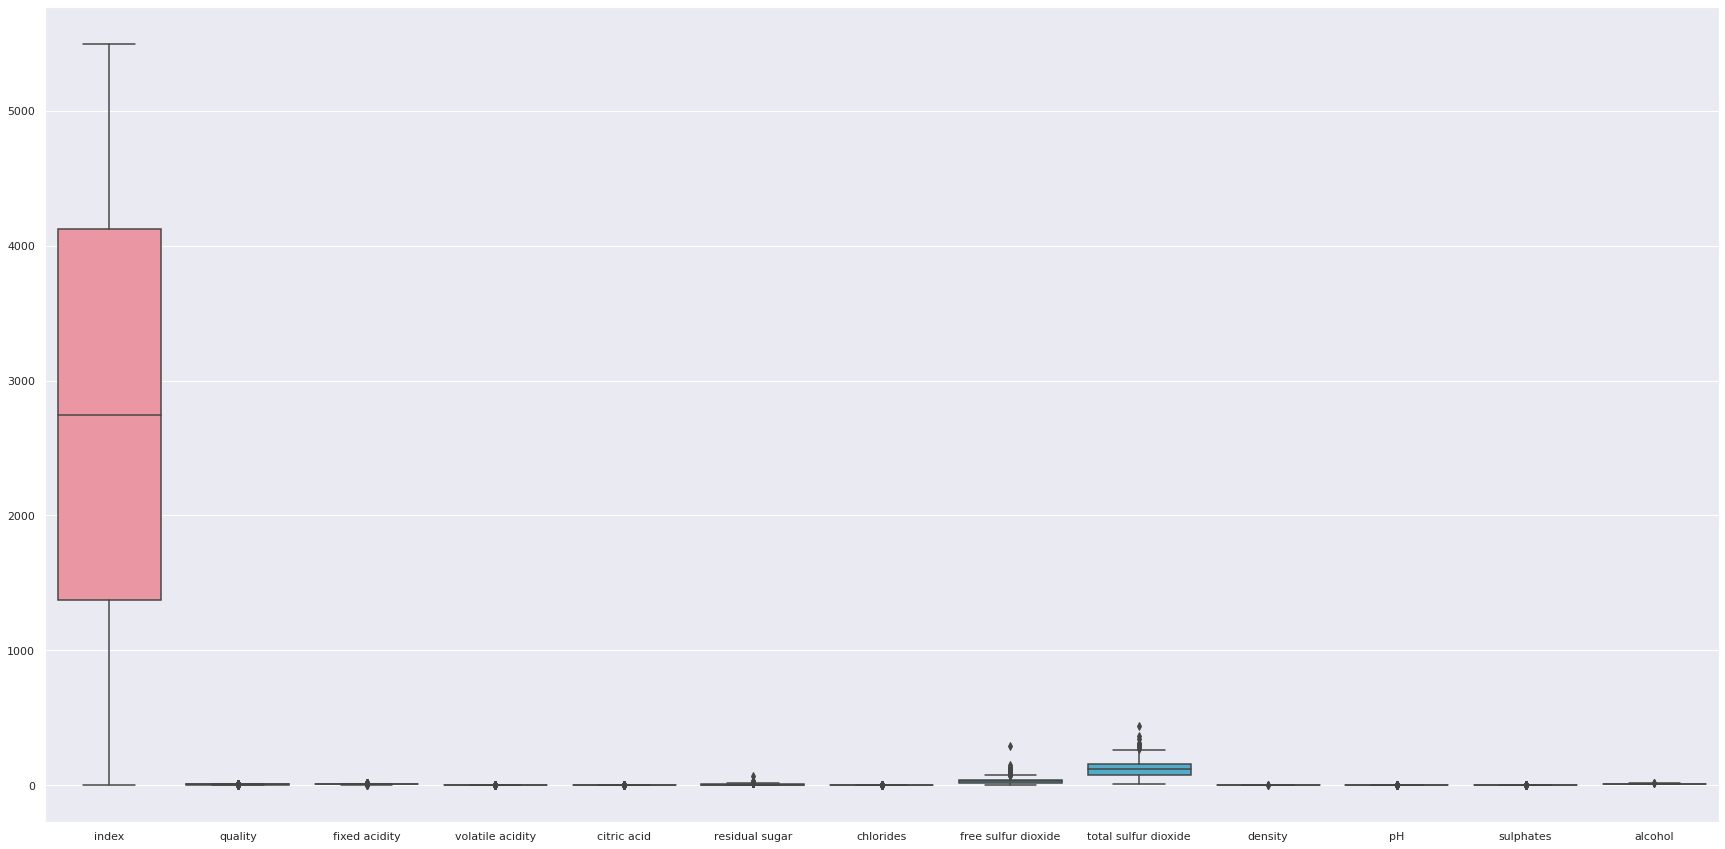

In [12]:
sns.set()
plt.figure(figsize=(30,15))
sns.boxplot(data=df)
plt.show()

In [13]:
df = df.drop('index', axis=1)

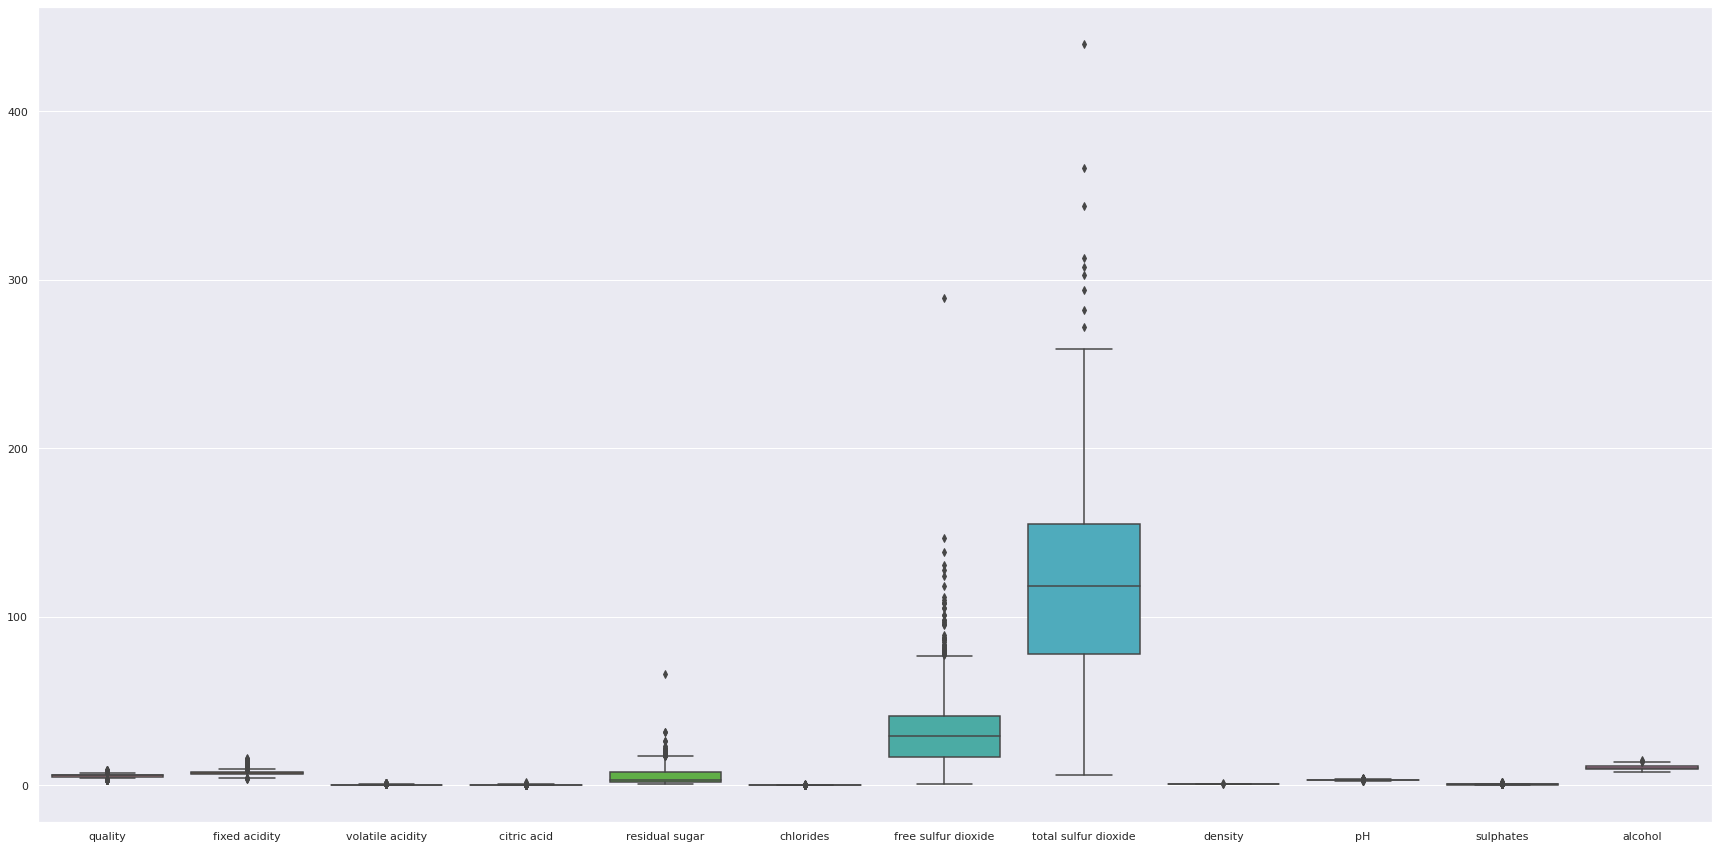

In [14]:
sns.set()
plt.figure(figsize=(30,15))
sns.boxplot(data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

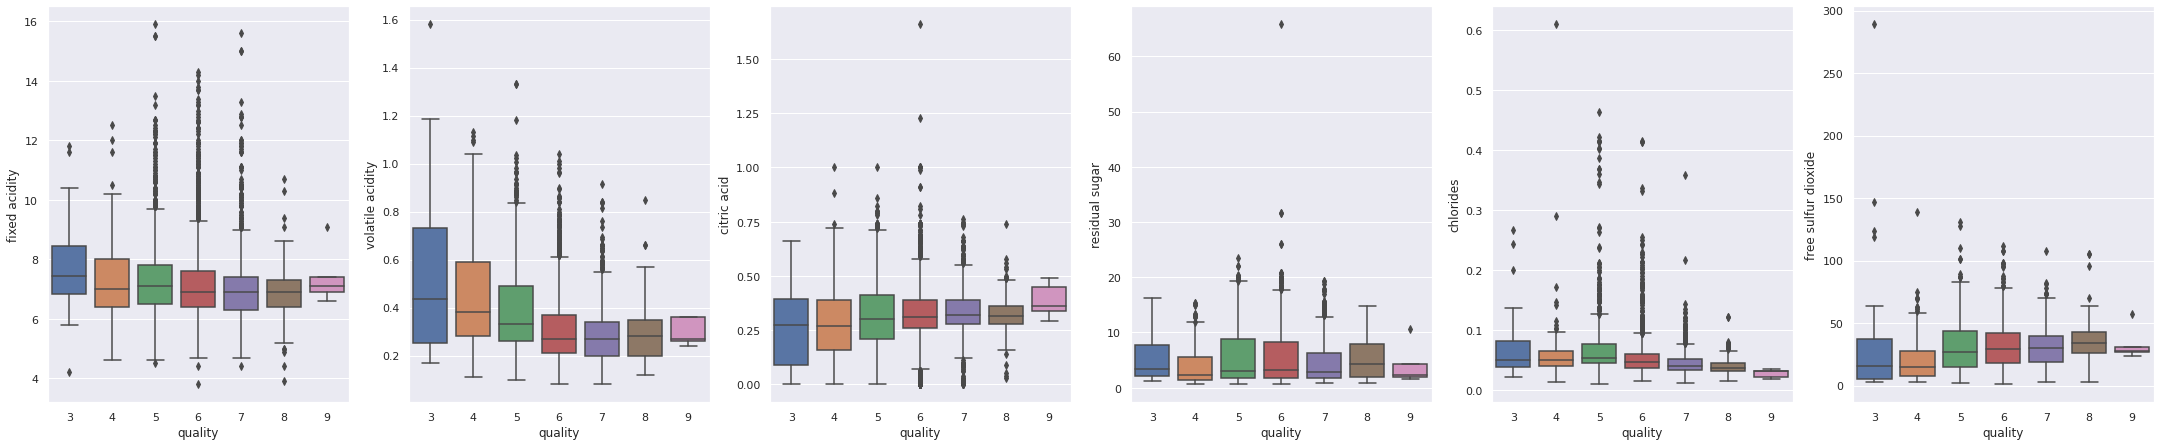

In [15]:
fig, ax =plt.subplots(1,6) # 그래프 그릴때, 1행 6열로 그려라
plt.subplots_adjust(right=5.0, top=1.5)
sns.boxplot(df['quality'], df['fixed acidity'], ax=ax[0])
sns.boxplot(df['quality'], df['volatile acidity'], ax=ax[1])
sns.boxplot(df['quality'], df['citric acid'], ax=ax[2])
sns.boxplot(df['quality'], df['residual sugar'], ax=ax[3])
sns.boxplot(df['quality'], df['chlorides'], ax=ax[4])
sns.boxplot(df['quality'], df['free sulfur dioxide'], ax=ax[5])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

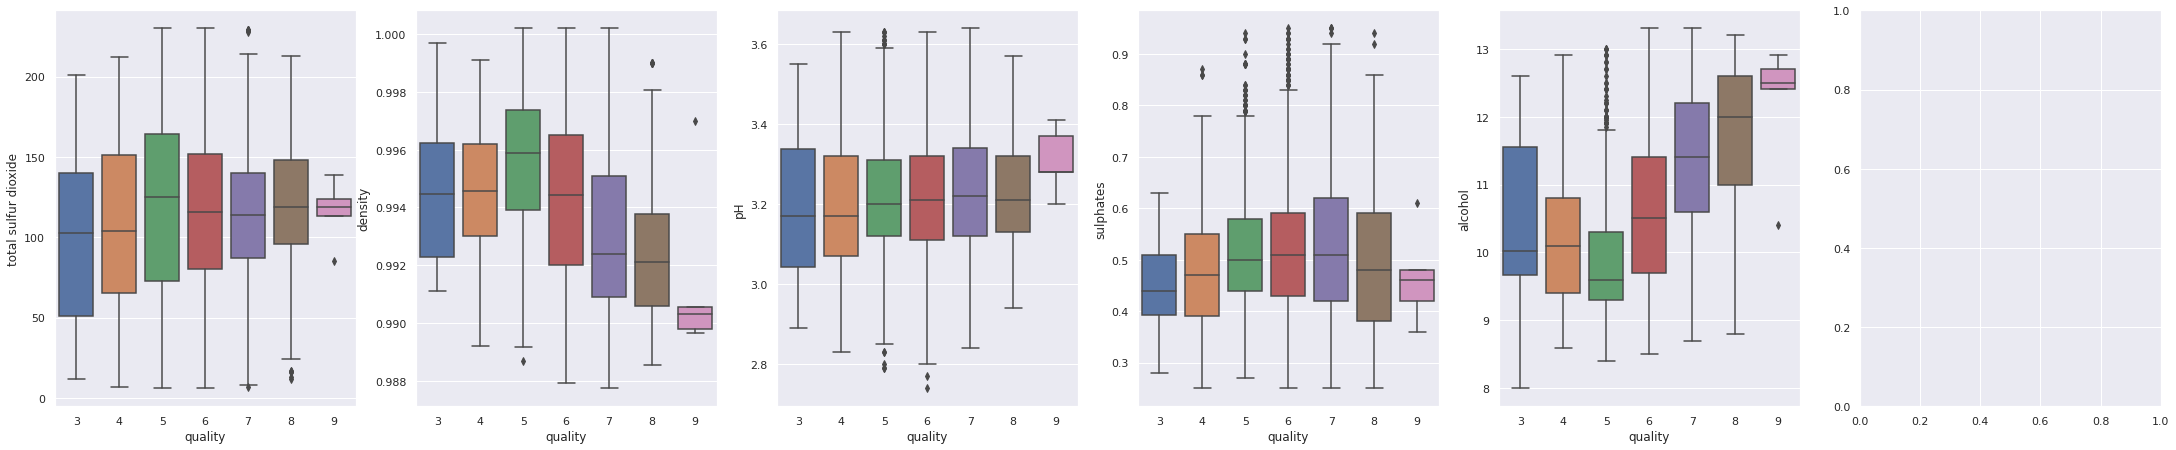

In [104]:
fig, ax =plt.subplots(1,6) # 그래프 그릴때, 1행 6열로 그려라
plt.subplots_adjust(right=5.0, top=1.5)

sns.boxplot(df['quality'], df['total sulfur dioxide'], ax=ax[0])
sns.boxplot(df['quality'], df['density'], ax=ax[1])
sns.boxplot(df['quality'], df['pH'], ax=ax[2])
sns.boxplot(df['quality'], df['sulphates'], ax=ax[3])
sns.boxplot(df['quality'], df['alcohol'], ax=ax[4])


plt.show()

In [17]:
# 이상치 삭제 trtbps, chol, thalachh, oldpeak
# 상위 95%에 위치하고 있는 데이터셋만 삭제 / 상위5% 하위 5% 삭제?

#df = df[df['fixed acidity'] < df['fixed acidity'].quantile(0.95)] # 5%는 제거가 된다. 아웃라이어가 제거 될 예정
df = df[df['volatile acidity'] < df['volatile acidity'].quantile(0.99)]
df = df[df['citric acid'] < df['citric acid'].quantile(0.99)]
df = df[df['residual sugar'] < df['residual sugar'].quantile(0.99)]
df = df[df['chlorides'] < df['chlorides'].quantile(0.99)]
df = df[df['free sulfur dioxide'] < df['free sulfur dioxide'].quantile(0.99)]
df = df[df['total sulfur dioxide'] < df['total sulfur dioxide'].quantile(0.99)]
df = df[df['density'] < df['density'].quantile(0.99)]
df = df[df['pH'] < df['pH'].quantile(0.99)]
df = df[df['sulphates'] < df['sulphates'].quantile(0.99)]
df = df[df['alcohol'] < df['alcohol'].quantile(0.99)]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

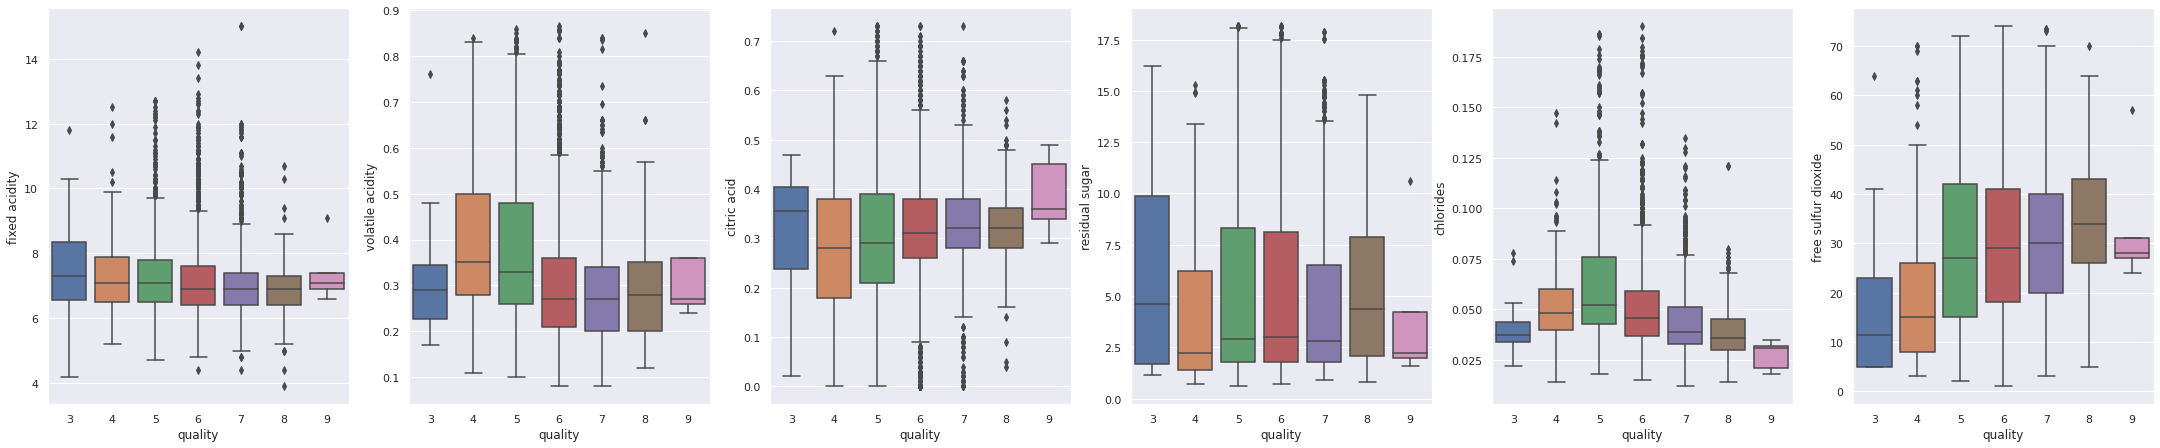

In [18]:
fig, ax =plt.subplots(1,6) # 그래프 그릴때, 1행 6열로 그려라
plt.subplots_adjust(right=5.0, top=1.5)
sns.boxplot(df['quality'], df['fixed acidity'], ax=ax[0])
sns.boxplot(df['quality'], df['volatile acidity'], ax=ax[1])
sns.boxplot(df['quality'], df['citric acid'], ax=ax[2])
sns.boxplot(df['quality'], df['residual sugar'], ax=ax[3])
sns.boxplot(df['quality'], df['chlorides'], ax=ax[4])
sns.boxplot(df['quality'], df['free sulfur dioxide'], ax=ax[5])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

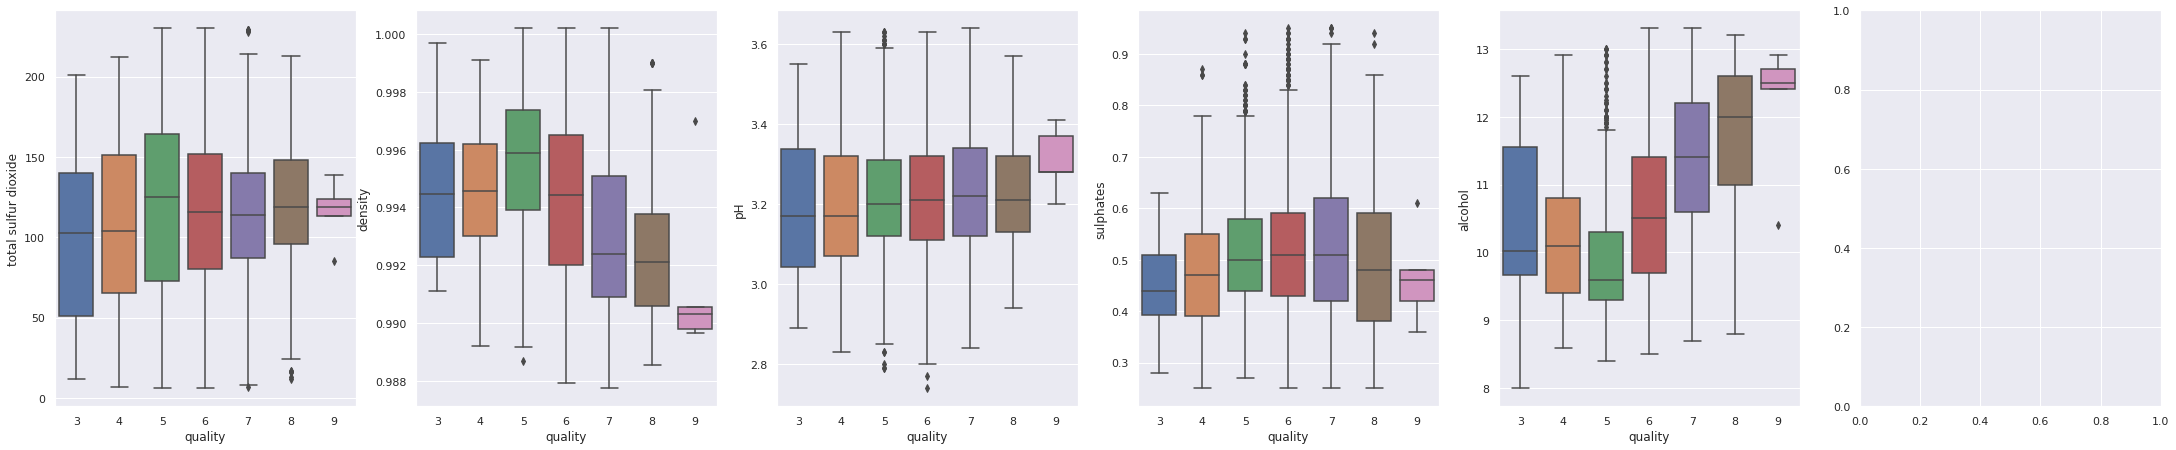

In [19]:
fig, ax =plt.subplots(1,6) # 그래프 그릴때, 1행 6열로 그려라
plt.subplots_adjust(right=5.0, top=1.5)

sns.boxplot(df['quality'], df['total sulfur dioxide'], ax=ax[0])
sns.boxplot(df['quality'], df['density'], ax=ax[1])
sns.boxplot(df['quality'], df['pH'], ax=ax[2])
sns.boxplot(df['quality'], df['sulphates'], ax=ax[3])
sns.boxplot(df['quality'], df['alcohol'], ax=ax[4])


plt.show()

In [20]:
# 데이터 확인

print("quality min : ", df['quality'].min())
print("quality max : ", df['quality'].max())
Qmean = df['quality'].mean()
print(f'quality mean : {Qmean:.1f}')
print(df['quality'].value_counts())

quality min :  3
quality max :  9
quality mean : 5.8
6    2186
5    1593
7     849
4     157
8     140
3      12
9       5
Name: quality, dtype: int64


#원 핫 인코딩 (하는이유는? type에 object로 white & red 가 들어 있으니까, 이걸 컴퓨터가 인식을 못할 수 있으니까 0,1 로 바꿔준다.)

In [21]:
df

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [22]:
dummies = pd.get_dummies(df['type'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop('type', axis=1, inplace=True)

In [23]:
df

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


Correlation between features


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
quality,1.000000,-0.071498,-0.234089,0.094242,-0.023891,-0.225096,0.093653,-0.026370,-0.300622,0.026478,0.058858,0.444279,0.108383
fixed acidity,-0.071498,1.000000,0.219776,0.303195,-0.135167,0.354183,-0.290405,-0.334494,0.428821,-0.219952,0.281524,-0.071373,-0.479846
volatile acidity,-0.234089,0.219776,1.000000,-0.414684,-0.200502,0.472692,-0.355516,-0.424515,0.287743,0.272707,0.235441,-0.054816,-0.664171
citric acid,0.094242,0.303195,-0.414684,1.000000,0.112707,-0.089821,0.127605,0.190300,0.029771,-0.305441,0.004924,0.039827,0.215935
residual sugar,-0.023891,-0.135167,-0.200502,0.112707,1.000000,-0.153308,0.419844,0.493991,0.530706,-0.260460,-0.194354,-0.364291,0.345087
chlorides,-0.225096,0.354183,0.472692,-0.089821,-0.153308,1.000000,-0.243987,-0.341826,0.478010,0.160945,0.324988,-0.312937,-0.641982
free sulfur dioxide,0.093653,-0.290405,-0.355516,0.127605,0.419844,-0.243987,1.000000,0.713554,0.024627,-0.142347,-0.191668,-0.164251,0.468912
total sulfur dioxide,-0.026370,-0.334494,-0.424515,0.190300,0.493991,-0.341826,0.713554,1.000000,0.021078,-0.243559,-0.294844,-0.262826,0.703188
density,-0.300622,0.428821,0.287743,0.029771,0.530706,0.478010,0.024627,0.021078,1.000000,0.064373,0.263669,-0.713450,-0.412127
pH,0.026478,-0.219952,0.272707,-0.305441,-0.260460,0.160945,-0.142347,-0.243559,0.064373,1.000000,0.266348,0.076738,-0.356854


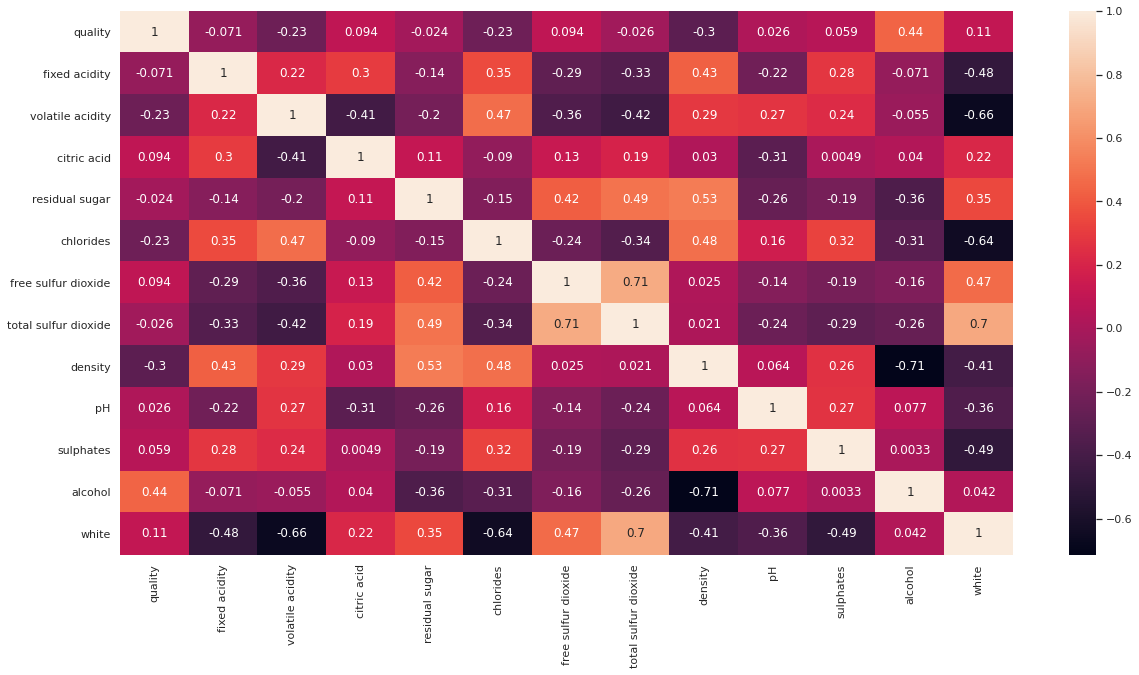

In [24]:
#Checking relationship between features
cor=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
cor

#Train-Test split

In [25]:
X = df.loc[:,df.columns!='quality']
y = df['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80, random_state=2)

In [26]:
print(X.shape)
print(y.shape)
#print(X_val.shape)
#print(y_val.shape)
print(X_train.shape)
print(y_train.shape)


(4942, 12)
(4942,)
(3953, 12)
(3953,)


In [27]:
# 수치형 데이터 정규화 (X_train과 y_train으로 나눈다음에 정규화 하는 것이다.)
numeric_var = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
scaler = StandardScaler()
X_train[numeric_var] = scaler.fit_transform(X_train[numeric_var])
X_test[numeric_var] = scaler.fit_transform(X_test[numeric_var])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [28]:
X_train[numeric_var]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2487,-0.903925,0.144254,-0.564907,-0.672448,-0.809773,-0.300468,0.347813,-1.386135,0.824858,0.576421,1.283391
3328,0.443664,2.425867,1.356912,-0.785332,2.682122,-0.614614,-0.046463,0.828630,-0.038366,1.537920,-1.057067
3655,-0.903925,-0.325490,-0.334289,-0.130608,-0.982213,1.647232,0.479239,-1.450435,-0.370376,-0.785702,1.716809
2347,-0.398579,-0.593915,-0.411161,1.652949,0.009313,0.893283,1.267791,1.264438,1.356073,-0.785702,-0.710333
345,-0.903925,-0.929446,0.434439,-0.604718,-0.508004,-0.363297,-0.290538,-1.053921,-0.237572,-0.144703,0.329871
...,...,...,...,...,...,...,...,...,...,...,...
3710,-0.145906,-0.862340,-0.103670,0.185465,-0.680444,0.076506,0.103738,-0.207309,0.160839,-0.064578,0.243187
1243,-0.145906,2.157442,-2.256108,-0.717602,0.569741,-1.368562,-1.679892,0.971518,1.688083,1.217420,-0.883700
2803,-0.061682,-0.862340,-0.103670,-0.988522,-1.456421,-1.619878,-1.623566,-1.846949,-0.104768,-1.266452,1.283391
4027,-0.482804,-0.325490,0.818803,0.659575,-0.378675,1.898548,1.530641,0.407110,-0.503179,-0.304953,-0.970384


In [29]:
X_test[numeric_var]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
98,-0.307026,2.987663,-2.291767,-0.626432,2.217829,-1.000097,-1.583022,0.763198,1.941031,0.235543,0.194725
4917,-0.564065,-0.821092,-0.181238,-0.853125,-0.285400,-0.239839,-0.906494,-0.908589,1.359467,-0.318728,0.552740
4932,-0.735424,0.437453,-0.482742,-0.014360,-0.716991,0.837194,0.315016,-0.955733,0.131719,-0.635454,0.731748
4613,-0.392705,-0.489896,-0.331990,-0.241053,0.879896,0.393710,1.649280,0.400554,0.519429,1.185722,-0.879322
2381,0.892489,-0.291178,0.195642,0.892412,-0.716991,-0.113129,0.070714,0.291761,-1.677593,-0.952180,0.373732
...,...,...,...,...,...,...,...,...,...,...,...
3894,-0.564065,-0.556135,1.100155,0.597711,-0.199082,1.407388,1.386186,0.458577,-0.126754,0.077180,-1.237338
4117,0.549770,0.636171,1.401659,1.776515,-0.846469,0.457065,0.822412,0.364290,-0.514464,-1.348088,0.731748
2881,-0.478385,2.391510,-2.291767,-0.694440,0.966215,-1.126807,-1.094418,0.835727,1.747177,1.185722,-1.147834
2846,-0.392705,2.424630,-1.688759,-0.320396,0.620942,-1.380226,-1.846117,-0.419020,1.359467,-0.002002,1.895299


In [30]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
2487,-0.903925,0.144254,-0.564907,-0.672448,-0.809773,-0.300468,0.347813,-1.386135,0.824858,0.576421,1.283391,1
3328,0.443664,2.425867,1.356912,-0.785332,2.682122,-0.614614,-0.046463,0.828630,-0.038366,1.537920,-1.057067,0
3655,-0.903925,-0.325490,-0.334289,-0.130608,-0.982213,1.647232,0.479239,-1.450435,-0.370376,-0.785702,1.716809,1
2347,-0.398579,-0.593915,-0.411161,1.652949,0.009313,0.893283,1.267791,1.264438,1.356073,-0.785702,-0.710333,1
345,-0.903925,-0.929446,0.434439,-0.604718,-0.508004,-0.363297,-0.290538,-1.053921,-0.237572,-0.144703,0.329871,1


In [31]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
98,-0.307026,2.987663,-2.291767,-0.626432,2.217829,-1.000097,-1.583022,0.763198,1.941031,0.235543,0.194725,0
4917,-0.564065,-0.821092,-0.181238,-0.853125,-0.285400,-0.239839,-0.906494,-0.908589,1.359467,-0.318728,0.552740,1
4932,-0.735424,0.437453,-0.482742,-0.014360,-0.716991,0.837194,0.315016,-0.955733,0.131719,-0.635454,0.731748,1
4613,-0.392705,-0.489896,-0.331990,-0.241053,0.879896,0.393710,1.649280,0.400554,0.519429,1.185722,-0.879322,1
2381,0.892489,-0.291178,0.195642,0.892412,-0.716991,-0.113129,0.070714,0.291761,-1.677593,-0.952180,0.373732,1


#Model Fitting - 1) Linear Regressor

In [32]:
log_reg = LogisticRegression().fit(X_train,y_train) # X_train 시험지 / y_train 정답지 자 이제 공부해

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
# 정확도 확인
print('Train data Score :' , log_reg.score(X_train,y_train))
print('Test data score : ' , log_reg.score(X_test,y_test))


Train data Score : 0.5497090817100936
Test data score :  0.5419615773508595


#머신 러닝 모델 구축 - 2) Decision Tree

In [34]:
tree = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=20,
                              min_samples_split=40).fit(X_train, y_train)

In [35]:
# 정확도 확인
print('Train data Score : ', tree.score(X_train, y_train))
print('Test data Score : ', tree.score(X_test, y_test))

Train data Score :  0.5755122691626613
Test data Score :  0.5490394337714863


#머신러닝 모델 구축 - 3) GradientBoostingClassifier

In [36]:
boost = GradientBoostingClassifier(max_depth=3,
                                   learning_rate=0.05).fit(X_train,y_train)

In [37]:
# 정확도 확인
print('Train data Score : ', boost.score(X_train, y_train))
print('Test data Score : ', boost.score(X_test, y_test))

#근데 이렇게 나와도 정확도가 평가 지표는 아니다! ROC로 평가한다.

Train data Score :  0.6632937009865925
Test data Score :  0.5813953488372093


#머신 러닝 모델 구축 - 4) Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [39]:
# Fit the model
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
y_pred=rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.6622851365015167

In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[  7  11  13   0   0   0]
 [  3 222 104   3   0   0]
 [  0  69 333  17   1   0]
 [  0   5  90  87   0   0]
 [  0   1  12   3   6   0]
 [  0   0   0   2   0   0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.70      0.23      0.34        31
           5       0.72      0.67      0.69       332
           6       0.60      0.79      0.69       420
           7       0.78      0.48      0.59       182
           8       0.86      0.27      0.41        22
           9       0.00      0.00      0.00         2

    accuracy                           0.66       989
   macro avg       0.61      0.41      0.45       989
weighted avg       0.68      0.66      0.65       989



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
df

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


#성능평가 - ROC커브 (다중 분류는 ROC 커브 안됨 -> Multiclass error) 안됨! -> 이진분류만 ROC 가능

# 여기서부터는 keras

In [47]:
df

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


In [48]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
2487,-0.903925,0.144254,-0.564907,-0.672448,-0.809773,-0.300468,0.347813,-1.386135,0.824858,0.576421,1.283391,1
3328,0.443664,2.425867,1.356912,-0.785332,2.682122,-0.614614,-0.046463,0.828630,-0.038366,1.537920,-1.057067,0
3655,-0.903925,-0.325490,-0.334289,-0.130608,-0.982213,1.647232,0.479239,-1.450435,-0.370376,-0.785702,1.716809,1
2347,-0.398579,-0.593915,-0.411161,1.652949,0.009313,0.893283,1.267791,1.264438,1.356073,-0.785702,-0.710333,1
345,-0.903925,-0.929446,0.434439,-0.604718,-0.508004,-0.363297,-0.290538,-1.053921,-0.237572,-0.144703,0.329871,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3710,-0.145906,-0.862340,-0.103670,0.185465,-0.680444,0.076506,0.103738,-0.207309,0.160839,-0.064578,0.243187,1
1243,-0.145906,2.157442,-2.256108,-0.717602,0.569741,-1.368562,-1.679892,0.971518,1.688083,1.217420,-0.883700,0
2803,-0.061682,-0.862340,-0.103670,-0.988522,-1.456421,-1.619878,-1.623566,-1.846949,-0.104768,-1.266452,1.283391,1
4027,-0.482804,-0.325490,0.818803,0.659575,-0.378675,1.898548,1.530641,0.407110,-0.503179,-0.304953,-0.970384,1


In [49]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
98,-0.307026,2.987663,-2.291767,-0.626432,2.217829,-1.000097,-1.583022,0.763198,1.941031,0.235543,0.194725,0
4917,-0.564065,-0.821092,-0.181238,-0.853125,-0.285400,-0.239839,-0.906494,-0.908589,1.359467,-0.318728,0.552740,1
4932,-0.735424,0.437453,-0.482742,-0.014360,-0.716991,0.837194,0.315016,-0.955733,0.131719,-0.635454,0.731748,1
4613,-0.392705,-0.489896,-0.331990,-0.241053,0.879896,0.393710,1.649280,0.400554,0.519429,1.185722,-0.879322,1
2381,0.892489,-0.291178,0.195642,0.892412,-0.716991,-0.113129,0.070714,0.291761,-1.677593,-0.952180,0.373732,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3894,-0.564065,-0.556135,1.100155,0.597711,-0.199082,1.407388,1.386186,0.458577,-0.126754,0.077180,-1.237338,1
4117,0.549770,0.636171,1.401659,1.776515,-0.846469,0.457065,0.822412,0.364290,-0.514464,-1.348088,0.731748,1
2881,-0.478385,2.391510,-2.291767,-0.694440,0.966215,-1.126807,-1.094418,0.835727,1.747177,1.185722,-1.147834,0
2846,-0.392705,2.424630,-1.688759,-0.320396,0.620942,-1.380226,-1.846117,-0.419020,1.359467,-0.002002,1.895299,0


In [50]:
onehot = pd.get_dummies(df['quality'])
onehot

,3,4,5,6,7,8,9
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
5492,0,0,1,0,0,0,0
5493,0,0,0,1,0,0,0
5494,0,0,0,0,1,0,0
5495,0,0,1,0,0,0,0


In [51]:
merged_df = pd.concat([df, onehot], axis = 1)
merged_df

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,3,4,5,6,7,8,9
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1,0,0,1,0,0,0,0
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0,0,0,1,0,0,0,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1,0,0,1,0,0,0,0
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1,0,0,0,1,0,0,0
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1,0,0,1,0,0,0,0
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1,0,0,0,1,0,0,0
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1,0,0,0,0,1,0,0
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1,0,0,1,0,0,0,0


In [52]:
# 기존 컬럼 삭제하기
merged_df.drop(['quality'], axis=1, inplace=True)
merged_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,3,4,5,6,7,8,9
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1,0,0,1,0,0,0,0
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0,0,0,1,0,0,0,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1,0,0,1,0,0,0,0
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1,0,0,0,1,0,0,0
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1,0,0,1,0,0,0,0
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1,0,0,0,1,0,0,0
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1,0,0,0,0,1,0,0
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1,0,0,1,0,0,0,0


In [53]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4942 entries, 0 to 5496
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4942 non-null   float64
 1   volatile acidity      4942 non-null   float64
 2   citric acid           4942 non-null   float64
 3   residual sugar        4942 non-null   float64
 4   chlorides             4942 non-null   float64
 5   free sulfur dioxide   4942 non-null   float64
 6   total sulfur dioxide  4942 non-null   float64
 7   density               4942 non-null   float64
 8   pH                    4942 non-null   float64
 9   sulphates             4942 non-null   float64
 10  alcohol               4942 non-null   float64
 11  white                 4942 non-null   uint8  
 12  3                     4942 non-null   uint8  
 13  4                     4942 non-null   uint8  
 14  5                     4942 non-null   uint8  
 15  6                    

In [54]:
npdf = np.array(merged_df)
type(npdf)

numpy.ndarray

In [55]:
# df = df[df['quality'] <= 4]#
y값 quality를 제한하고 싶으면 위에 코드 사용

# 0타점 : 1040
# 1타점 : 343
# 2타점 : 132
# 3타점 : 45
# 4타점 : 24
# 5타점 : 5
# 6타점 : 1
# 7타점 : 1


In [56]:
npdf

array([[5.6  , 0.695, 0.06 , ..., 0.   , 0.   , 0.   ],
       [8.8  , 0.61 , 0.14 , ..., 0.   , 0.   , 0.   ],
       [7.9  , 0.21 , 0.39 , ..., 0.   , 0.   , 0.   ],
       ...,
       [7.8  , 0.15 , 0.34 , ..., 1.   , 0.   , 0.   ],
       [6.6  , 0.41 , 0.31 , ..., 0.   , 0.   , 0.   ],
       [7.   , 0.35 , 0.17 , ..., 0.   , 0.   , 0.   ]])

# 데이터셋 생성하기

In [89]:
# 학습 데이터 만들기
# X_train에 학습 데이터에 3495개와 12개 변수
X_train = npdf[:4500, 0:12].astype('float')
print(X_train.shape)

# y_train에 학습 데이터 3495개와 7개 타겟
y_train = npdf[:4500, 12:19].astype('float')
print(y_train.shape)

# X_test 데이터에 1447개와 12개 변수
X_val = npdf[4500:, 0:12].astype('float')
print(X_val.shape)

# y_test에 학습 데이터 1447개와 7개 타겟
y_val = npdf[4500:, 12:19].astype('float')
print(y_val.shape)

(4500, 12)
(4500, 7)
(442, 12)
(442, 7)


모델 입력을 위한 레이블(정답)전처리

In [90]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
print(y_train[1])
# print(y_val[1])
print(y_val[1])

[0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0.]


In [92]:
#from tensorflow.keras.utils import to_categorical
# 타점 데이터의 레이블 0 ~ 5 숫자 값을 범주형 형태로 변경해준다.
#y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)
#y_test = to_categorical(y_test)

## 모델 구성하기

In [93]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(12,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))


## 모델 설정하기

In [94]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

모델 학습하기

In [95]:
history = model.fit(X_train,
                    y_train,
                    epochs = 1000,
                    batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/1000
36/36 [==============================] - 1s 11ms/step - loss: 8.1802 - accuracy: 0.2560 - val_loss: 1.7436 - val_accuracy: 0.3801
Epoch 2/1000
36/36 [==============================] - 0s 2ms/step - loss: 1.7701 - accuracy: 0.3582 - val_loss: 1.3276 - val_accuracy: 0.3801
Epoch 3/1000
36/36 [==============================] - 0s 3ms/step - loss: 1.3175 - accuracy: 0.3977 - val_loss: 1.2444 - val_accuracy: 0.4457
Epoch 4/1000
36/36 [==============================] - 0s 3ms/step - loss: 1.2667 - accuracy: 0.4496 - val_loss: 1.2280 - val_accuracy: 0.4389
Epoch 5/1000
36/36 [==============================] - 0s 3ms/step - loss: 1.2544 - accuracy: 0.4526 - val_loss: 1.2152 - val_accuracy: 0.4434
Epoch 6/1000
36/36 [==============================] - 0s 3ms/step - loss: 1.2743 - accuracy: 0.4465 - val_loss: 1.2187 - val_accuracy: 0.4706
Epoch 7/1000
36/36 [==============================] - 0s 2ms/step - loss: 1.2410 - accuracy: 0.4608 - val_loss: 1.2169 - val_accuracy: 0.4661
Epoch

##모델 그려보기

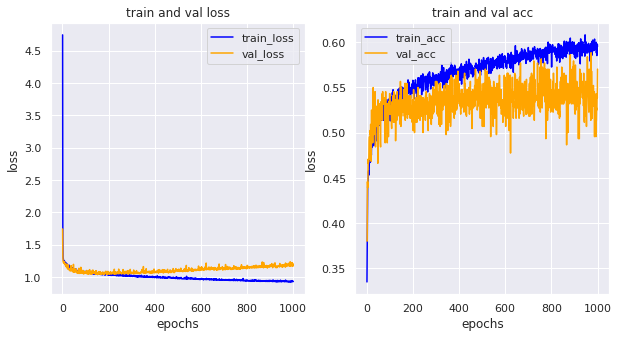

In [96]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

# train 정확도와 val 정확도가 만나는 시점이 가장 좋은 spot이다.
# 만약 이 격차가 벌어진다면 overfitting 된다고 볼 수 있다.

## 모델 평가하기

In [97]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

46/46 [==============================] - 0s 1ms/step - loss: 1.0029 - accuracy: 0.5895
accuracy: 58.95%


## 모델 예측하기

예측값 그려서 확인해보기

In [98]:
import numpy as np
np.set_printoptions(suppress=True)

results = model.predict(X_test)
print(results.shape)
np.set_printoptions(precision=7) # numpy 소수점 제한
print(f'각 클래스에 속할 확률 : \n{results[0]}')


(1447, 7)
각 클래스에 속할 확률 : 
[0.0007029 0.002469  0.0908235 0.4860179 0.3156782 0.104286  0.0000226]


## 모델 평가 방법 - 혼동행렬

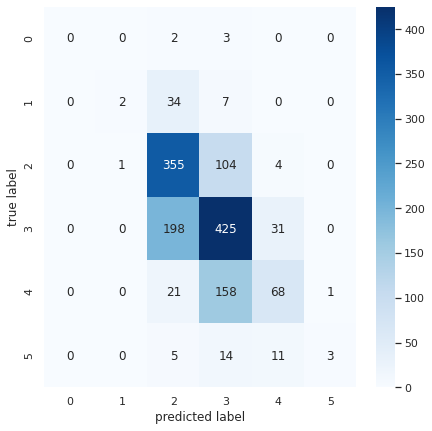

In [99]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# 색이 진할수록 정확도가 높아진다.
# 예측에 많이 틀리는 것을 찾을 수 있다.


## 모델 평가 방법 2 - 분류 보고서

In [100]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

# recall 값이 가장 떨어지는 8값의 글씨를 보완해서 학습을 시키자



               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.67      0.05      0.09        43
           2       0.58      0.77      0.66       464
           3       0.60      0.65      0.62       654
           4       0.60      0.27      0.38       248
           5       0.75      0.09      0.16        33

    accuracy                           0.59      1447
   macro avg       0.53      0.30      0.32      1447
weighted avg       0.59      0.59      0.56      1447



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
